# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to underline text in plots
from matplotlib import rc

## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
%run get_data.ipynb
print("All data is ready!")

Data directly from API is ready to go!
Pulling from API...
Covid19 Data directly from API is ready to go!
Saved seemingly flawless covid19 data.
All data is ready!


## Control
The list "list_of_dates_to_plot_incidences" contains all the dates for which a map of Germany with the counties colored corresponding to the seven days incidence of this date should be created.<br/>
Use "range(0, len(non_county_specific_data\['UTC'\]))" to plot maps for all dates. This very memory intensive task could get interrupted because the memory is full.

In [3]:
list_of_dates_to_plot_incidences = range(250, 350, 10)

## Plots
The following code creates multiple plots out of the data to give a rough overview of the possibilities.

### Number of Seven Days Incidences
Plots all seven days incidences of all days availlable.<br/>
Is used to get a feeling of how many incidences are above certain thresholds and which ranges contain solid data and which are statistical noise.
<br/><br/>
In the first cell below, the user can set the range of plotted incidences and multiple horizontal lines which help the user to more easily read the data.

In [4]:
range_of_incidences = (350, 100000)    # the seven days incidence cannot get above 100,000
draw_horizontal_line_in_plot_at_position = [400, 500, 600]

In [5]:
incidences_in_range = list()
for countys_series_of_incidences in [county['incidences'] for county in covid19.values()]:
    for incidence in countys_series_of_incidences:
        if incidence > range_of_incidences[0] and incidence < range_of_incidences[1]:
            incidences_in_range.append(incidence)
incidences_in_range.sort()

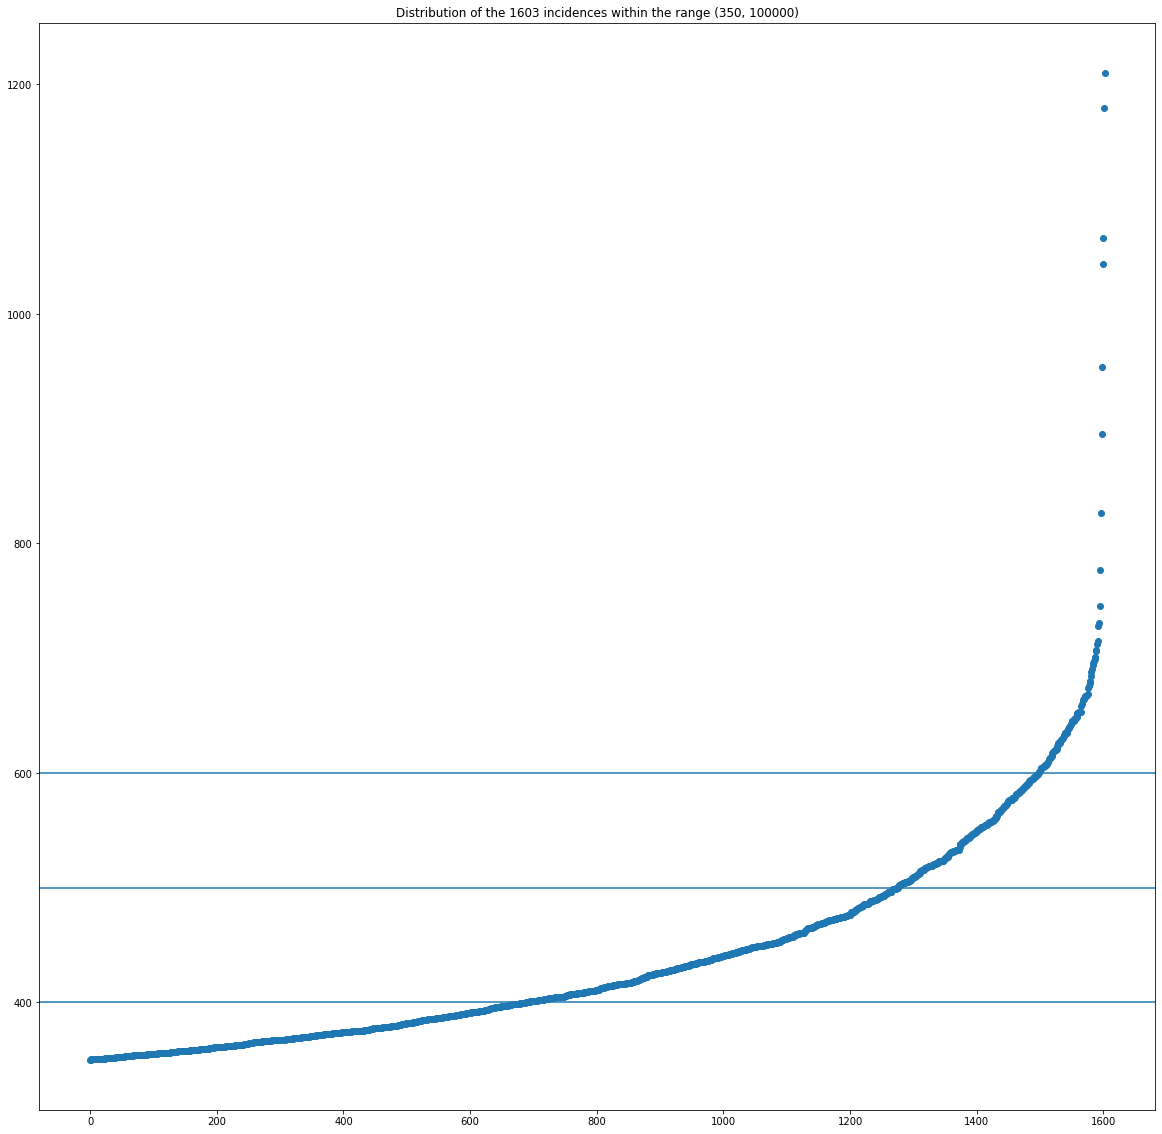

In [6]:
plt.figure(figsize=(20, 20))    # initiate and enlarge plot
for yvalue in draw_horizontal_line_in_plot_at_position:
    plt.axhline(yvalue)
plt.title("Distribution of the {} incidences within the range {}".format(
           len(incidences_in_range), range_of_incidences))
plt.scatter([e for e in range(len(incidences_in_range))], incidences_in_range)
plt.show()

### Incidences Sorted by Federal States
The series of the seven days incidence of every county are plotted into 16 plots: Sorted by the federal state the county is located in.
<br/><br/>
This process is also used to check that every county is related to one federal state:<br/>
The AdmUnitIDs of the counties (Gemeindeschlüssel) are copied to "covid19_copy".
The AdmUnitID of every county found with the state identifier is removed from the "covid19_copy". If any AdmUnitIDs remain in the end, an alert is triggered.

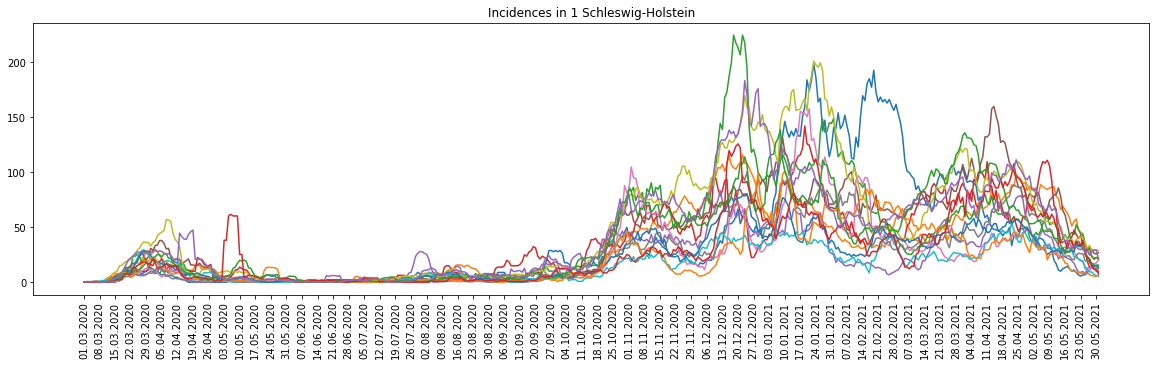

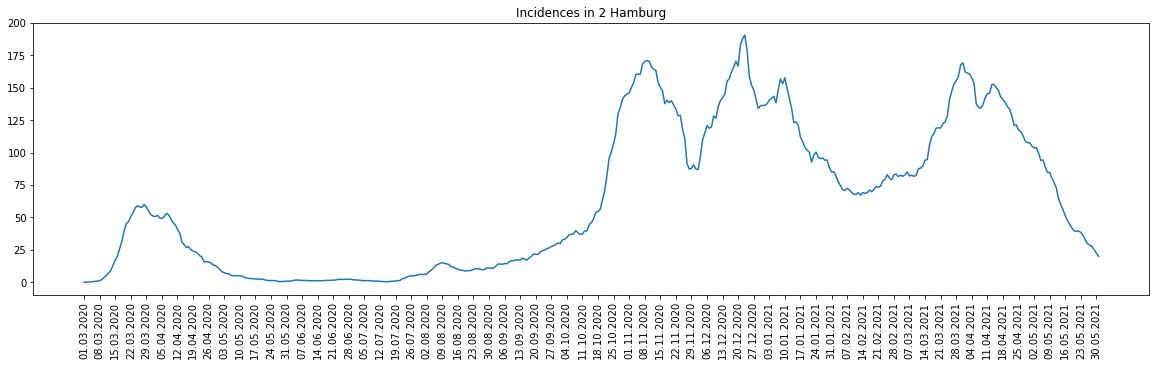

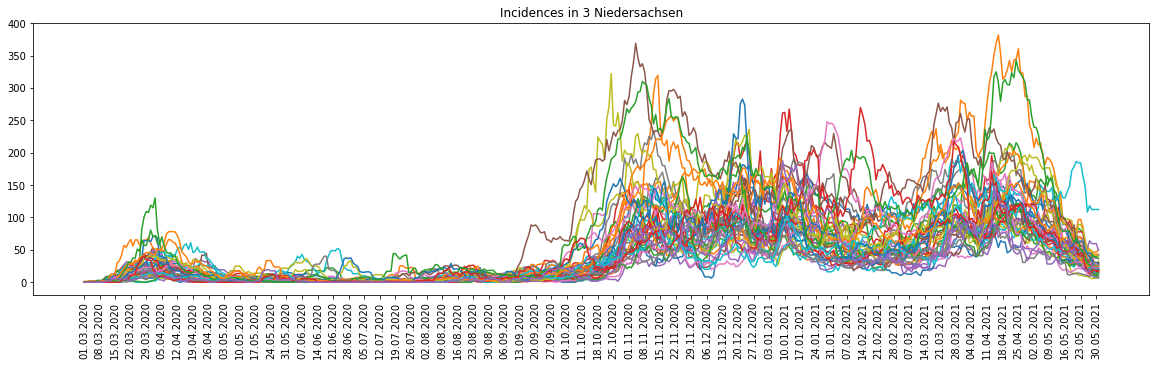

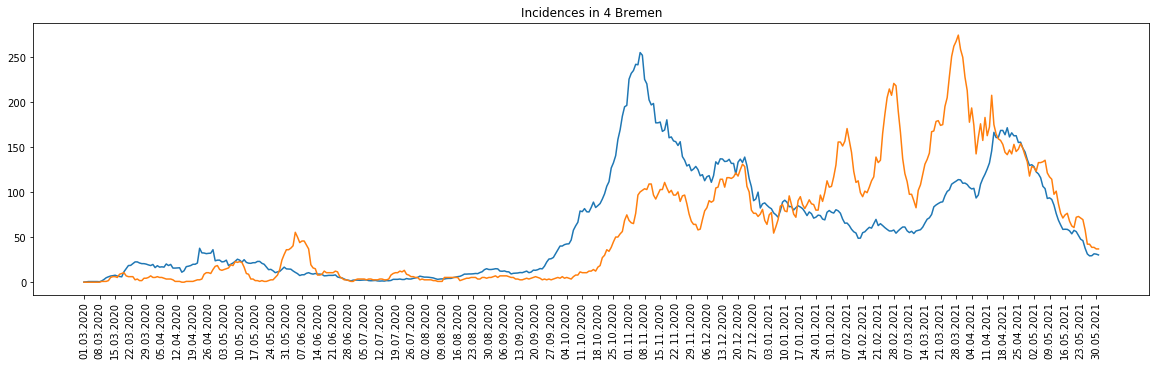

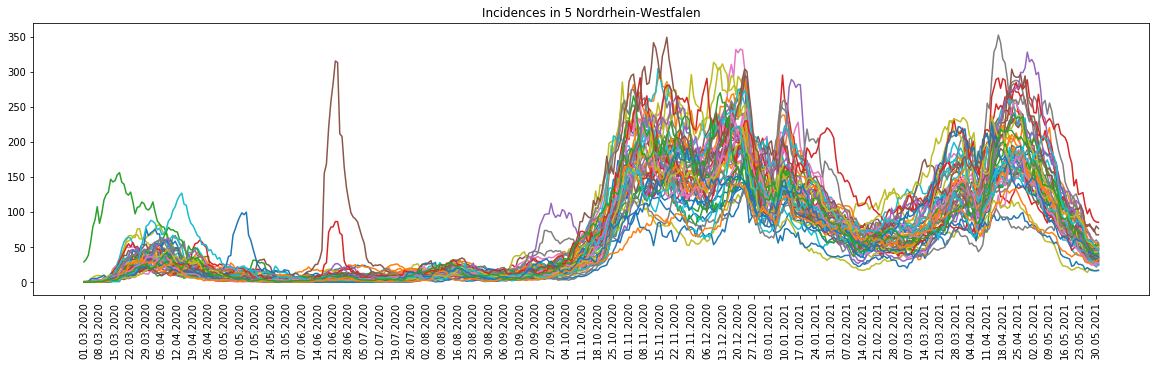

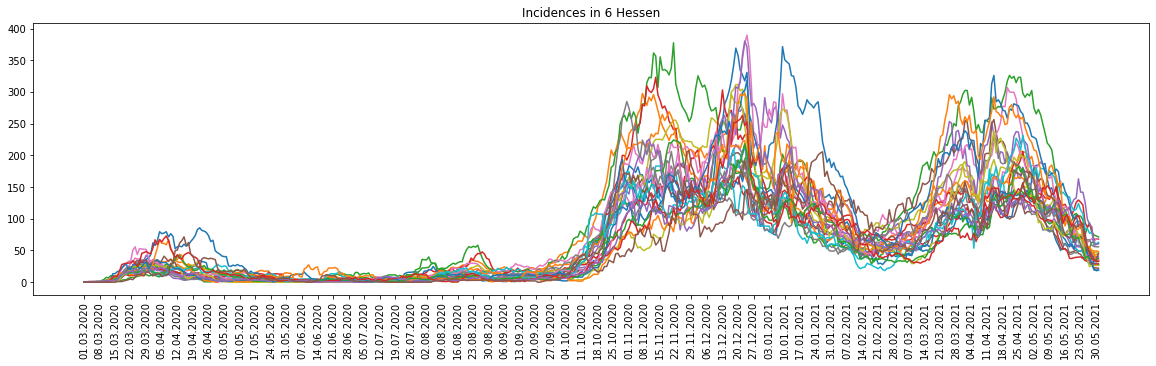

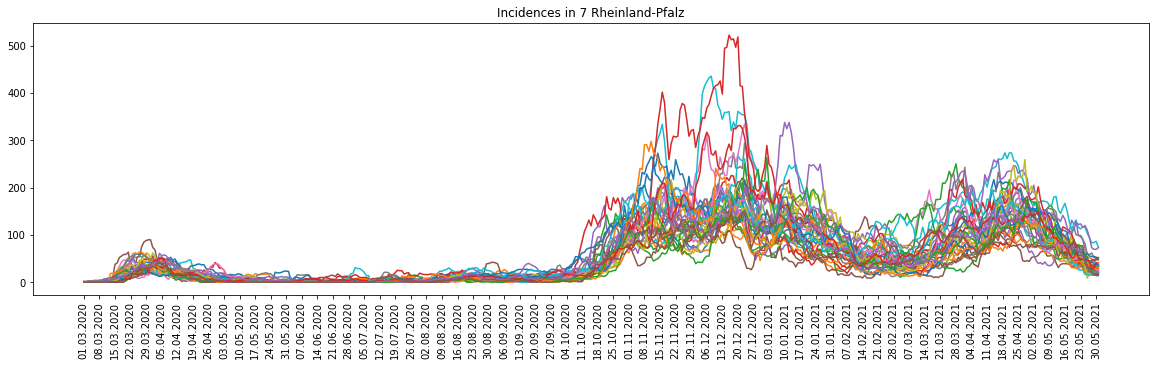

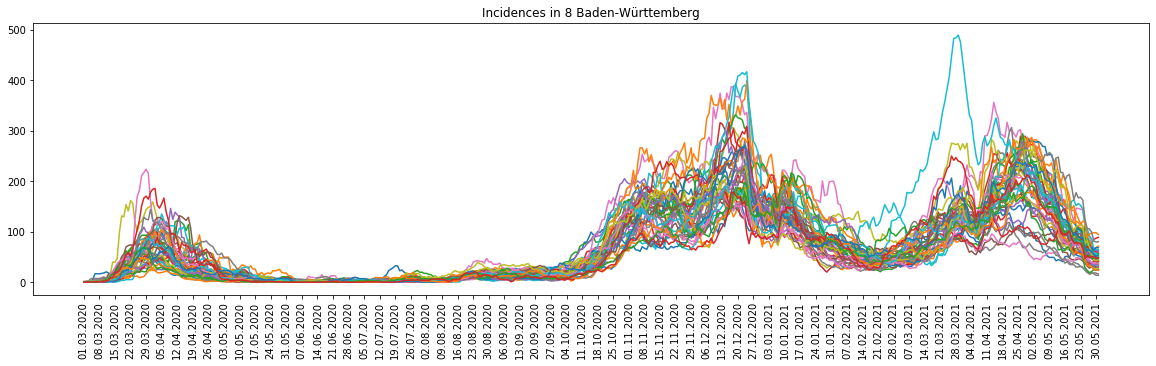

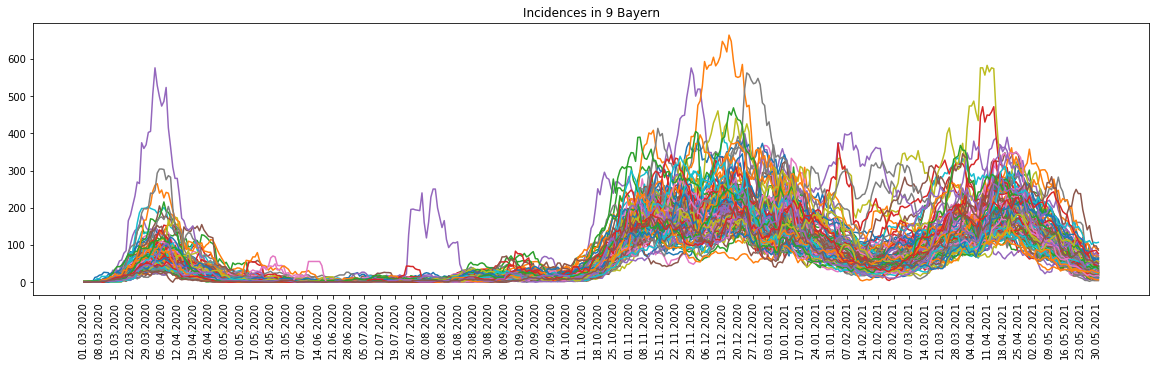

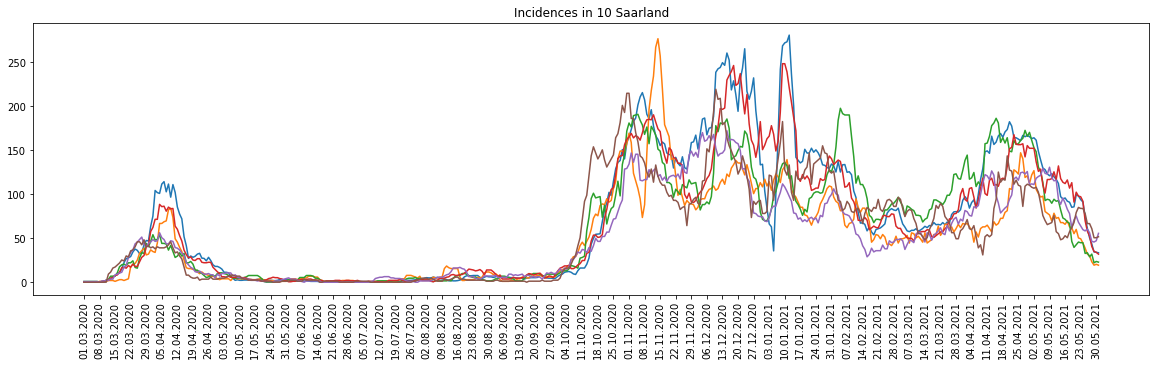

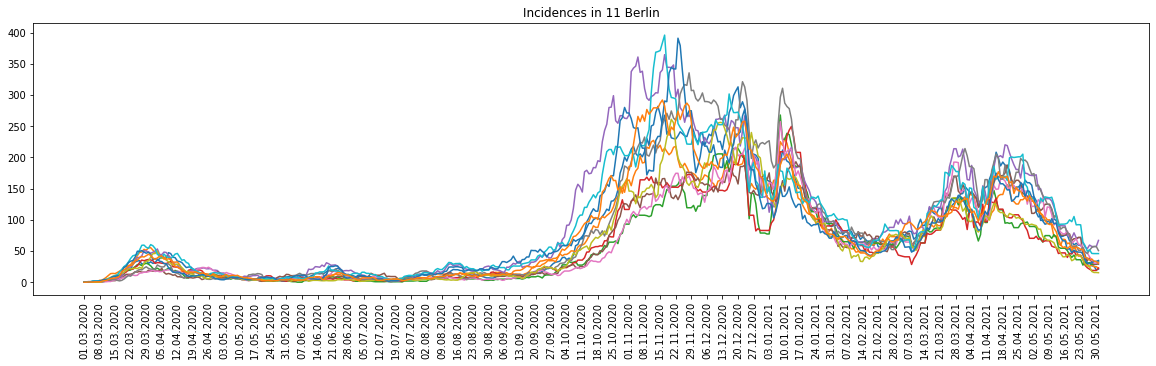

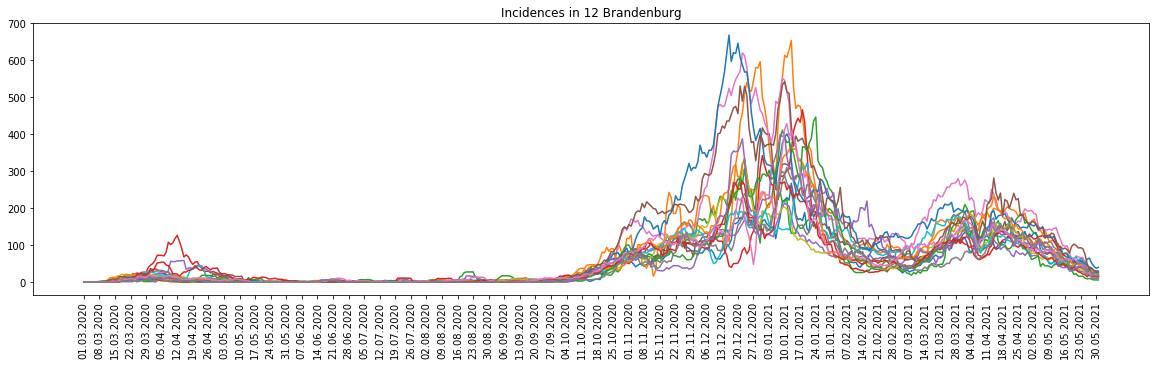

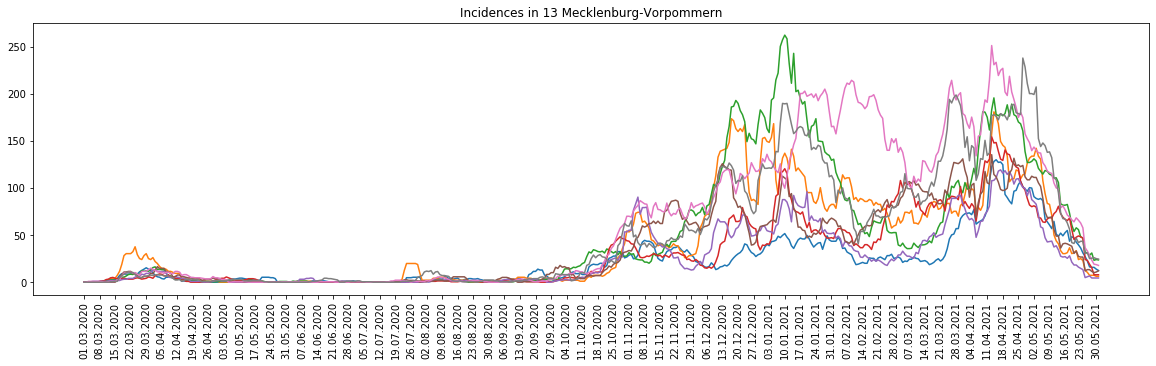

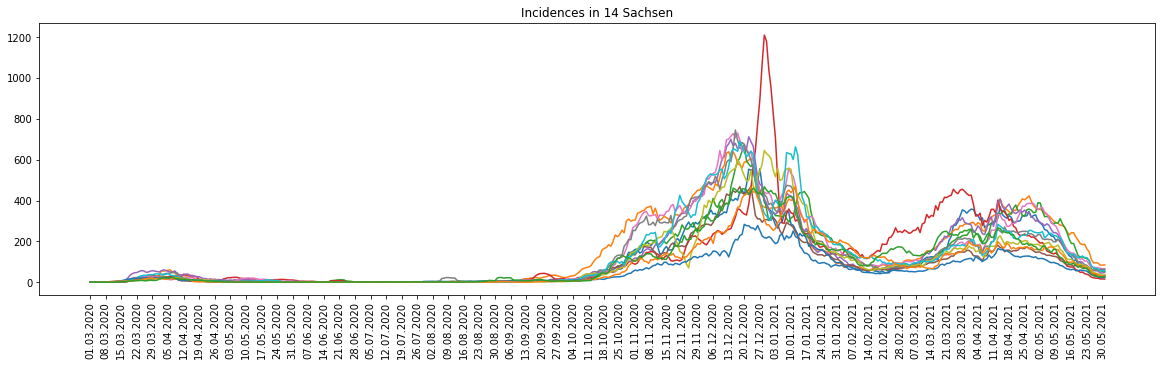

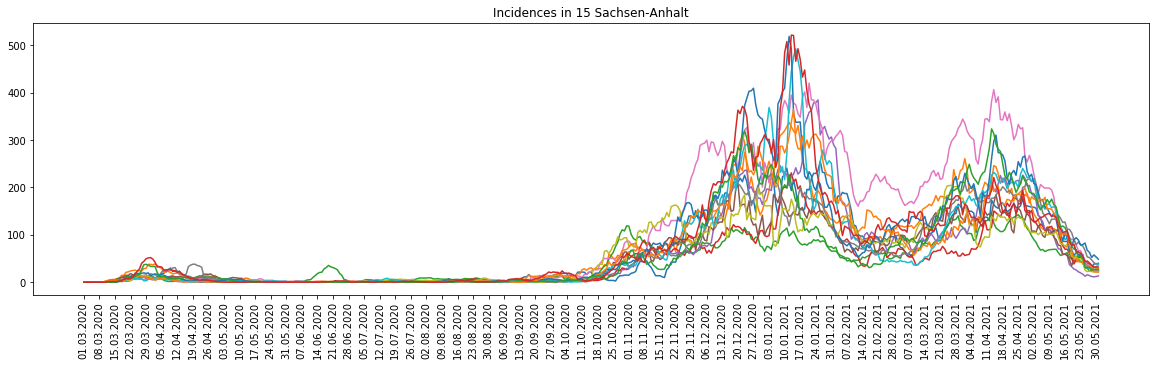

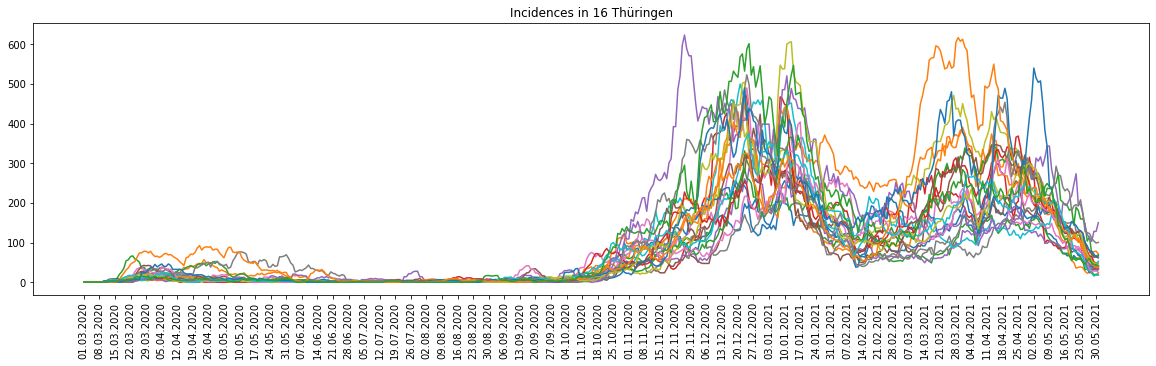

In [7]:
covid19_keys_copy = list(covid19.keys())
for stateID, state in non_county_specific_data['states'].items():
    plt.figure(figsize=(20, 5))    # initiate and enlarge plot

    for AdmUnitID, county in covid19.items():
        if AdmUnitID[:-3] == stateID:
            plt.plot(non_county_specific_data["unixtime"], county['incidences'])
            covid19_keys_copy.remove(AdmUnitID)

    plt.xticks(non_county_specific_data["unixtime"][::7],
               non_county_specific_data['UTC'][::7], rotation='vertical')
    plt.title("Incidences in {} {}".format(stateID, state))
    plt.show()

In [8]:
if len(covid19_keys_copy) != 0:
    print('There seems to be at least one county being unrelated to any federal state:')
    for AdmUnitID in covid19_keys_copy:
        print(AdmUnitID + " " + counties_geography[AdmUnitId]['name'])

## Plot Data of One State
The user can choose one federal state in the first cell below.
Afterwards the development of the seven days incidence of each county in the federal state is plotted.

In [9]:
state_ID = "13"
print("You have chosen {} {}.".format(state_ID, non_county_specific_data['states'][state_ID]))

You have chosen 13 Mecklenburg-Vorpommern.


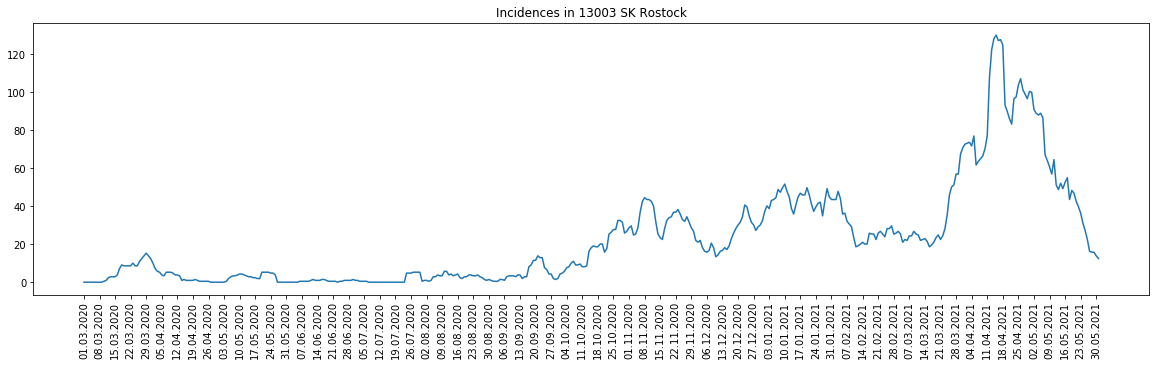

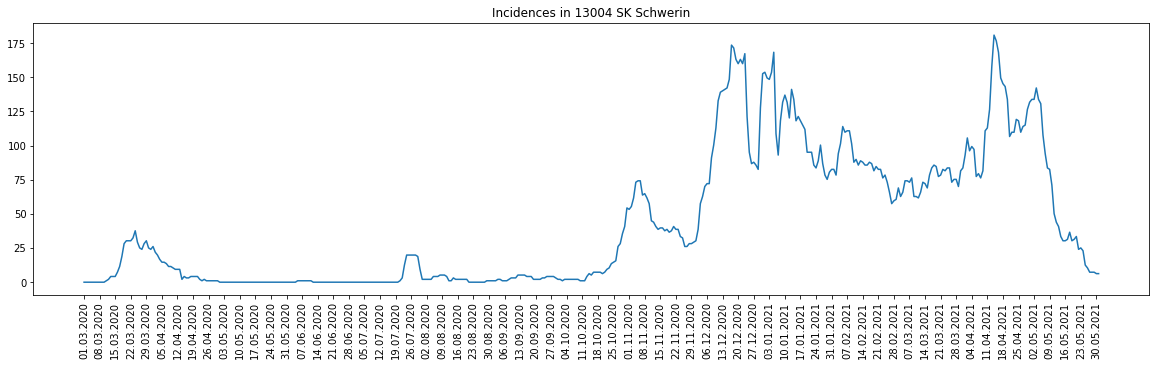

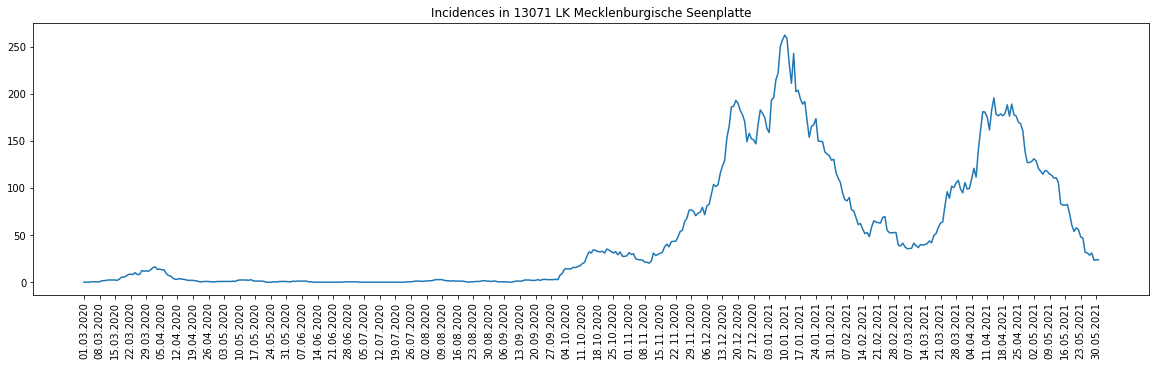

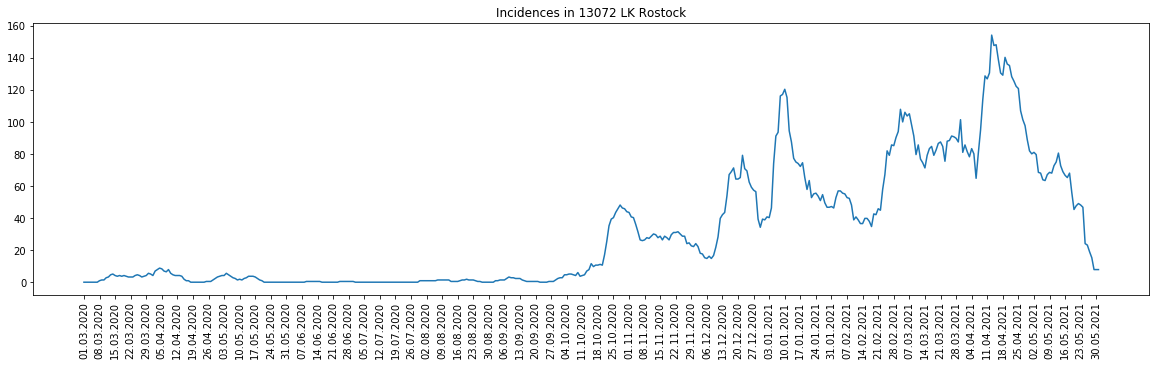

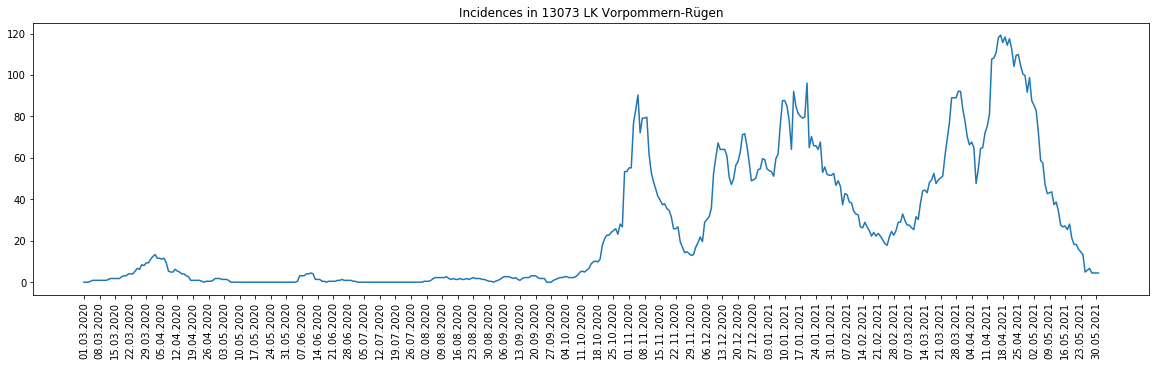

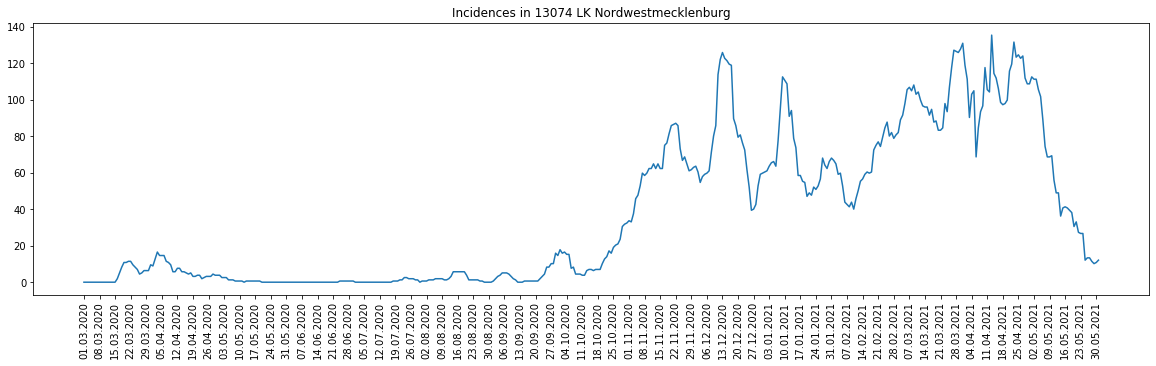

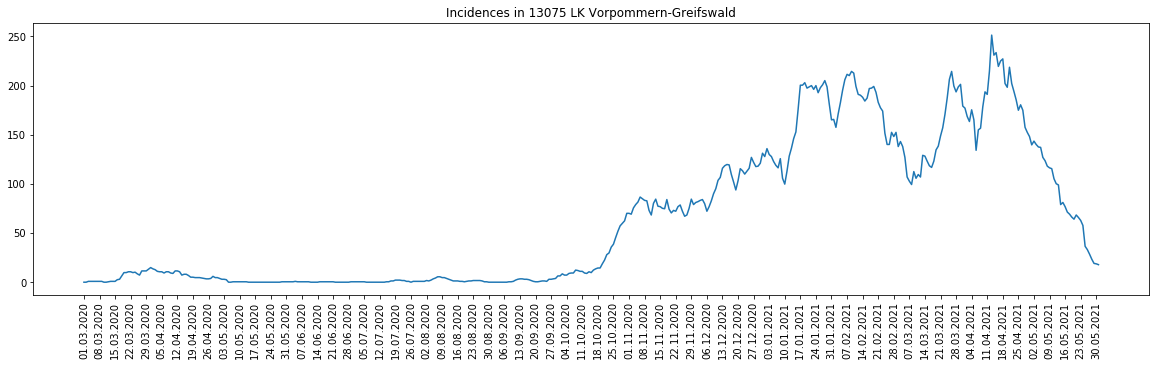

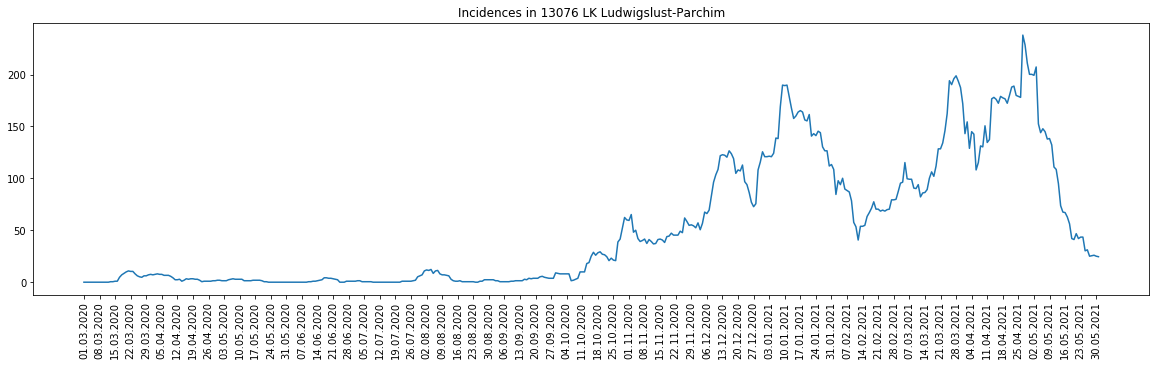

In [10]:
for AdmUnitID, county in covid19.items():
    if AdmUnitID[:-3] == state_ID:
        plt.figure(figsize=(20, 5))    # enlarge plot
        plt.xticks(non_county_specific_data["unixtime"][::7],
                   non_county_specific_data['UTC'][::7], rotation='vertical')
        plt.plot(non_county_specific_data["unixtime"], county['incidences'])
        plt.title("Incidences in " + AdmUnitID + " " + counties_geography[AdmUnitID]['name'])
        plt.show()

## The Colored Map of Germany
The series of color-coded maps with the seven days incidence used for the video "germany_incidence_V4_300ms_1080p_music.mp4" is generated here.<br/>
The maps show all German counties forming the map of Germany, whereas the color of a county represents its seven days incidence as defined by the legend.

In [11]:
# check if the needed directories are availlable - otherwise create them
if not(os.path.isdir("media")): os.makedirs("media")
if not(os.path.isdir("media/germany_incidence_V5")): os.makedirs("media/germany_incidence_V5")

### Defining the Color Spectrum
This part creates a color spectrum specifically for the German map of seven days incidences.<br/>
The seven days incidence of a county is directly interpreted as an index of the color spectrum. All incidences higher than the highest index are assigned the color of the last element in the spectrum.
<br/><br/>
As shown in the plot with the distribution of the number of seven days incidences, a seven days incidence between 0 and 50 is way more common amongst the counties than a seven days incidence between 300 and 350. Therefore the steps in the green spectrum are set to be bigger to make a bigger optical difference compared to the bigger numbers in the upper spectrum which only occur occasionally and differ more due to the exponential growth of a pandemic.
<br/><br/>
After multiple tries of plotting and tweaking the color spectrum, it more or less contains an exponential growth, which makes sense from an epidemiological perspective: If a county currently has 100 COVID-19 cases, it is way more likely that ten of them infect one person (in total ten) than that the only case in a county with currently one COVID-19 case infects ten more people. Therefore the jumps get statistically bigger the higher the seven days incidence grows.
<br/>
This is compensated by the step width of the color spectrum: the incidence must grow 10 times more in the highest part of the spectrum than in the lowest part of the spectrum to get the same numerical change of color due to the 10 times lower step width.
<br/><br/>
Or from another perspective: most of the time most of the counties are green and hard to distinguish, so the green color part is compressed to get more incidences in the red spectrum.

In [12]:
color_spectrum = list()
for color_step in np.arange(0.4,1,0.05):
    color_spectrum.append((0, color_step, 0))
for color_step in np.arange(0,1,0.02):
    color_spectrum.append((color_step, 1, 0))
for color_step in np.arange(0,1,0.01):
    color_spectrum.append((1, 1 - color_step, 0))
for color_step in np.arange(0,0.94,0.005):
    color_spectrum.append((1 - color_step, 0, 0))

In [13]:
def plot_map_of_germany_incidences(date_index):
    for AdmUnitID, county in covid19.items():
        if county['incidences'][date_index] >= len(color_spectrum):
            color = color_spectrum[-1]
        else:
            color = color_spectrum[int(county['incidences'][date_index])]

        for polygon in counties_geography[AdmUnitID]['geometry']:
            x, y = np.array(polygon).T
            plt.fill(x, y, color=color)
        # draw the lines around the counties
        for polygon in counties_geography[AdmUnitID]['raw_geometry']:
            x, y = np.array(polygon).T
            plt.plot(x, y, color="black")

In [14]:
def plot_legend_incidences():
    ax1 = plt.axes([0.01, 0.2, 0.06, 0.65], # postion of the legend: [left, bottom, width, height]
                   frameon=False)
    ax1.axes.get_xaxis().set_visible(False)

    ax1.yaxis.tick_right()
    plt.yticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350],
               [0,25,50,75,100,125,150,175,200,225,250,275,300,325,">350"], fontsize=90)
    plt.ylabel('Seven-days-incidence', fontsize=100, rotation='vertical')

    for index in range(len(color_spectrum)):
        plt.fill([1, 2, 2, 1], 2*[1+index] + 2*[2+index], color=color_spectrum[index])
        if index % 25 == 0:    # create black lines besides the ticks
            plt.fill([1, 2, 2, 1], 2*[index] + 2*[1+index], color="black")

    # Add a black block at the end of the spectrum so that the highest tick (>350) has no ugly offset
    plt.fill([1, 2, 2, 1], 2*[len(color_spectrum)] + 2*[10+len(color_spectrum)], color="black")

In [15]:
def plot_histogram_incidences(date_index):
    # postion of the histogram: [left, bottom, width, height]
    plt.axes([0.96, 0.31, 0.55, 0.36], facecolor='lightgrey')
    plt.title(r"\textbf{Number of counties with given incidence}", fontsize=90, usetex=True, y=1.02, x=0.5)

    plt.xlabel("Incidence", fontsize=70)
    plt.xticks([num for num in range(0,351,50)], fontsize=70)
    plt.xlim(0, 350)

    plt.ylabel("Number of counties", fontsize=75)
    plt.yticks([num for num in range(10, 150, 10)], fontsize=70)
    plt.ylim(0, 150)

    _, _, bars = plt.hist([county['incidences'][date_index] for county in covid19.values()],
             bins=[num for num in range(0,351,25)], edgecolor="black")
    
    for bar in bars:
        plt.setp(bar, "facecolor", color_spectrum[int(bar.get_x())])

    plot_distribution_of_incidences_over_350(date_index)

In [16]:
def plot_distribution_of_incidences_over_350(date_index):
    # postion of the histogram: [left, bottom, width, height]
    ax = plt.axes([1.55, 0.31, 0.04, 0.36],facecolor='lightgrey')
    ax.axes.get_yaxis().set_visible(False)
    plt.ylim(0, 150)
    plt.xticks([375], [">350"], fontsize=70)
    plt.xlim(350, 400)
    
    _, _, bars = plt.hist([county['incidences'][date_index] for county in covid19.values()], bins=[350, 100000])
    
    plt.setp(bars[0], "facecolor", "black")

In [17]:
def display_text_incidences(date_index):
    # range of dates in the bottom left corner
    plt.text(0.5, -25, non_county_specific_data['UTC+7days'][date_index] + " to ", fontsize=80)
    plt.text(0.5, -39, non_county_specific_data['UTC+7days'][date_index + 7], fontsize=80)
    # title top right
    plt.text(17.5, 345, r'\textbf{\underline{Seven-days-incidence in Germany}}',
              fontweight=220, fontsize=160, usetex=True)
    # definition of seven days incidence top right
    plt.text(17.5, 330, "The number of COVID-19 cases in the last 7 days", fontsize=95)
    plt.text(17.5, 315, "of each German county scaled to 100.000 people", fontsize=95)
    plt.text(17.5, 300, "covering the period " + non_county_specific_data['UTC'][0] +
             " to " + non_county_specific_data['UTC'][-1] + ".", fontsize=95)
    # data source and creater bottom right
    plt.text(17.5, 12, "Data from the COVID-19 Datenhub " +
             "referenced by the Robert-Koch-Institut (www.rki.de):", fontsize=55)
    plt.text(17.5, 2, 'npgeo-corona-npgeo-de.hub.arcgis.com ' +
             '(Used "RKI History" and "RKI Corona Landkreise")', fontsize=55)
    plt.text(17.5, -13, 'Created by Leander Bürkin (leander.buerkin@gmail.com),',fontsize=55)
    plt.text(17.5, -23, 'Laboratory for Simulation, Prof. Dr. Lars Pastewka, ' +
             'Albert-Ludwigs-Universität Freiburg', fontsize=55)
    plt.text(17.5, -33, 'https://github.com/leanderbuerkin/bachelor_project', fontsize=55)

In [18]:
for date_index in list_of_dates_to_plot_incidences:
    plt.figure(figsize = (50, 65), facecolor='darkgrey')
    ax = plt.axes(frameon=False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plot_map_of_germany_incidences(date_index)
    plot_histogram_incidences(date_index)
    plot_legend_incidences()
    display_text_incidences(date_index)
    plt.savefig("media/germany_incidence_V5/" + str(date_index) + '.png',
                facecolor="darkgrey", bbox_inches=Bbox([[-3.5,9],[84,57]]))
    plt.close('all')